# Arrays and matrices
Arrays are multidimensaional data collections of one single `mode`, like `numeric`, `character`, &c.

Creating arrays

In [7]:
zeros <- array(0, c(2, 3))
zeros

0,0,0
0,0,0


In [55]:
A <- array(c(seq.int(1, 5, 2), seq.int(5, 9, 2), seq.int(9, 13, 2)), c(3, 3))
B <- array(c(6, 2, 5, 1, 1, 1, 10, 13, 1), c(3, 3))
x <- array(c(1, 2, 3))
A
B
x

1,5,9
3,7,11
5,9,13


6,1,10
2,1,13
5,1,1


[1] 1 2 3

## Transpose and permutations

Calculating a simple transpose

In [60]:
B
t(B)

6,1,10
2,1,13
5,1,1


6,2,5
1,1,1
10,13,1


Another way of calculating a transpose is to use the generalized permutation function `aperm`. See `?aperm` for more information.

In [64]:
B
aperm(B, c(1, 2)) # B again
aperm(B, c(2, 1)) # B transposed

6,1,10
2,1,13
5,1,1


6,1,10
2,1,13
5,1,1


6,2,5
1,1,1
10,13,1


In [68]:
C <- array(1:27, c(3, 3, 3))
aperm(C, c(3, 2, 1))

, , 1

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]   10   13   16
[3,]   19   22   25

, , 2

     [,1] [,2] [,3]
[1,]    2    5    8
[2,]   11   14   17
[3,]   20   23   26

, , 3

     [,1] [,2] [,3]
[1,]    3    6    9
[2,]   12   15   18
[3,]   21   24   27

## Matrix multiplication
Like in `numpy`, multiplying a matrix by another matrix works element-wise, not like the matrix multiplication we expect. To do so we have to use an explicit operator `%*%`.

In [2]:
A <- t(matrix(c(1:3, 1:3, 1:3), c(3, 3, 3)))
A

B <- A

x <- matrix(1:3)
x

1,2,3
1,2,3
1,2,3


1
2
3


In [10]:
A * B

1,4,9
1,4,9
1,4,9


In [12]:
A %*% B # Notice the difference

6,12,18
6,12,18
6,12,18


In [15]:
A * x # This produces an error 

ERROR: Error in A * x: non-conformable arrays


In [14]:
A %*% x # But this works as expected

14
14
14


## Inverse and linear systems
The function `solve` solves linear equations of the type $Ax = b$. `solve(A, b)` returns the matrix $x$.

In [5]:
B <- array(c(6, 2, 5, 1, 1, 1, 10, 13, 1), c(3, 3))
det(B) # Check if matrix is singular
inv <- solve(B)
inv

[1] -39

0.30769231,-0.23076923,-0.07692308
-1.61538462,1.12820513,1.48717949
0.07692308,0.02564103,-0.10256410


In [58]:
solution <- solve(B, x)
solution

[1] -0.3846154  5.1025641 -0.1794872

## Outer products
Outer products are cartesian products of the elements of two arrays. Product here can be a generic function that takes two arguments and returns a single result.

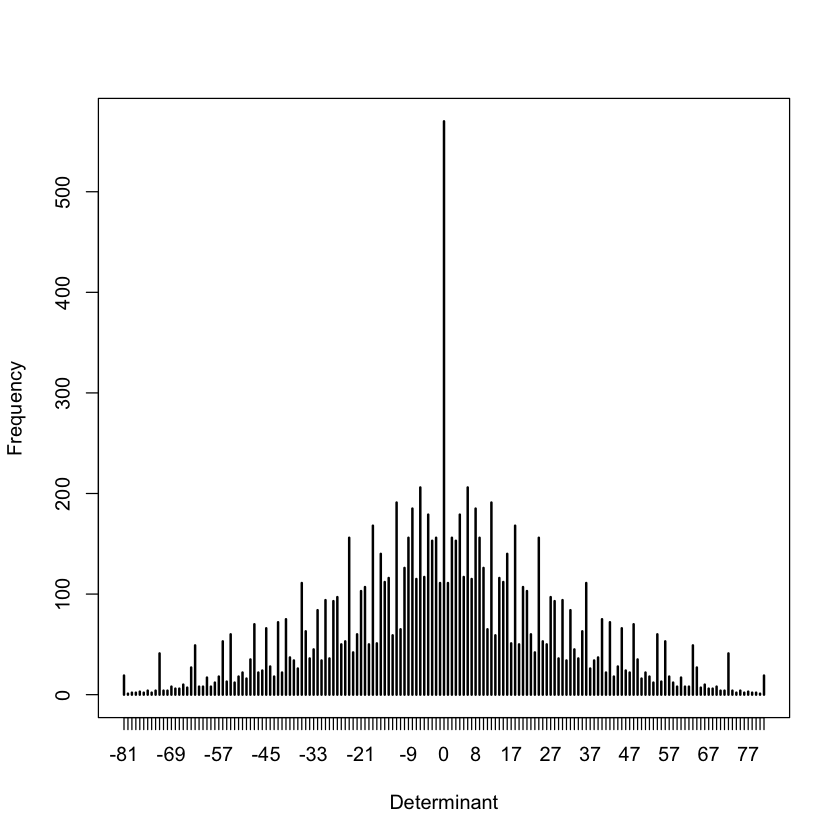

In [ ]:
d <- outer(0:9, 0:9)
fr <- table(outer(d, d, "-"))
plot(fr, xlab="Determinant", ylab="Frequency")

## Eigenvalues and eigenvectors
A crucial part of linear algebra is to calculate the _eigenvalues_ and _eigenvectors_ of a given linear transformation (or matrix).

`eigen` produces a list with 2 elements: `values` and `vectors`

In [7]:
B <- array(c(6, 2, 5, 1, 1, 1, 10, 13, 1), c(3, 3))
ev <- eigen(B)
ev

eigen() decomposition
$values
[1] 12.0475352 -4.7316842  0.6841489

$vectors
           [,1]       [,2]         [,3]
[1,] -0.7229310 -0.3150369 -0.196501375
[2,] -0.5773944 -0.8495789  0.980482603
[3,] -0.3794556  0.4230455  0.006408944


If the matrix is too large and you only need the _eigenvalues_, you can skip the calculation of _eigenvectors_.

In [10]:
evalues <- eigen(B, only.values = TRUE)$values
evalues
class(evalues)

[1] 12.0475352 -4.7316842  0.6841489

[1] "numeric"

## Concatenating matrices with `cbind` and `rbind`

In [11]:
A <- matrix(c(1:3, 1:3, 1:3), c(3, 3))
B <- t(A)

A
B

1,1,1
2,2,2
3,3,3


1,2,3
1,2,3
1,2,3


In [12]:
cbind(A, B)

1,1,1,1,2,3
2,2,2,1,2,3
3,3,3,1,2,3


In [13]:
rbind(A, B)

1,1,1
2,2,2
3,3,3
1,2,3
1,2,3
1,2,3
